# Evaluating Regression Models

## What
- Since models are approximations of reality, we're measuring how closely our linear models approximate reality.
- With evaluating regression models, we'll calculate this closeness by measuring the error, which is the distance between the regression line (prediction) and actual data points.

## Why
Techniques in this lesson answer the following questions:
- How do we know if our model is good enough?
- How do we evaluate our model?
- Is our model valuable?
- Are our features valuable?

## How - what is our approach?
- Prerequisites
    1. Establish a baseline (often the average of the target $\bar{y}$)
    2. Build a super simple model (or isolate the model we're evaluating)
    3. Calculate baseline and model residuals
- Evaluate the model
    1. Calculate SSE, MSE, and RMSE (Root Mean Squared Error)
    2. Determine if the model is significant
    3. Determine if the features are significant

## When do we evaluate a model?
- As soon as we've got a super basic model, it's important to know if it beats baseline. 
- If so, we'll keep on modeling, making new models, tuning, etc... 
- If not, maybe a different model or different feature(s) will help.

## Vocabulary
- Baseline is often the mean, but could also be the median or "last year's" model, in practice.
- Line of best fit = regression line == linear model that best fits the data points.
- Residuals: for each data point, the vertical distance between each predicted $\hat{y}$ and actual $y$ values.. This is $\hat{y} - y$
- Linear model = a line that best approximates reality.
- $y = mx + b$ is a linear model
- SSE = sum of squared errors
- MSE = mean squared error
- RMSE = root mean squared error = sqrt(MSE)
    - Taking the square root means we get same units as y

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

# Linear Model
from statsmodels.formula.api import ols

## Predicting Lemonade Sales 

In [2]:
# Let's work with some sales data!
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")
df["log_rainfall"] = np.log(df.rainfall)

df.head()

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179
3,44.1,1.05,28,17,0.048790
4,42.4,1.00,33,18,0.000000


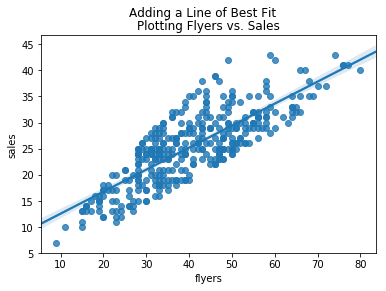

In [3]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")

sns.regplot(x="flyers", y="sales", data=df)
plt.show()

## Okay, so .regplot can add a line of best fit
- But is this model any good?
- Is it better than a baseline?
- How do we get a baseline?
- And is this this model significant?
- What does it mean that the points are spread out from the line? 
- What does it mean if they're close to the line?

## The Evaluation Playbook is here to help!
- Prerequisites:
    1. Establish a baseline
    2. Produce a super simple model
    3. Calculate the model and baseline residuals
- Evaluation
    1. Calculate evaluation metrics from residuals
    2. Determine if the model is significant
    3. Determine if the features are significant (we'll do this later)

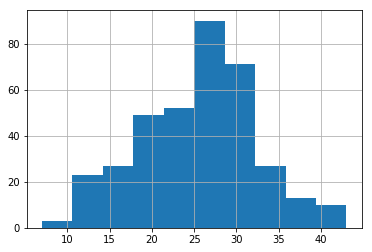

In [4]:
df.sales.hist()

In [5]:
# Pre-requisite Part 1 - establish a baseline. 
# Since sales are reasonably normally distributed, the mean will do!
baseline = df.sales.mean()

In [6]:
# Pre-requisite Part 2 - build/identify a super simple linear model
# We'll use statsmodels OLS (ordinary least squares method here)
# More on Modeling later.
from statsmodels.formula.api import ols

# The arguments to the ols function are the column names as strings, separated by ~
# ols("y ~ x") 
# ols("target ~ feature")
model = ols('sales ~ flyers', df).fit()

In [7]:
# Pre-requisite Part 3 - Calculate residuals
evaluate = pd.DataFrame()

evaluate["x"] = df.flyers

# Our y is our dependent variable
evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

# y-hat is shorthand for "predicted y" values
evaluate["yhat"] = model.predict()

# Calculate the baseline residuals 
# Residual is predicted minus actual
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# Calculate the model residuals
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head(4)

,x,y,baseline,yhat,baseline_residual,model_residual
0,15,10,25.323288,14.673754,15.323288,4.673754
1,15,13,25.323288,14.673754,12.323288,1.673754
2,27,15,25.323288,19.727926,10.323288,4.727926
3,28,17,25.323288,20.149107,8.323288,3.149107


## So how do we answer if the model beats the baseline
- Our metric will be the sum of squared errors
- We sum up the squares of every residual from baseline
- We sum up the squares of every residual from model
- Then we compare

Here's the quick and easy arithmetic answer:
- Square the baseline_residual to get the baseline_sse
- Square the model_residual to get the model_sse

In [8]:
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


## Now let's consider evaluation metrics
- Sum of Square Error (SSE)
    - Squaring makes larger errors more significant
    - Squaring also removes negative residuals
- Mean Squared Error (MSE)
    - Average of all the squared errors
- Root Mean Squared Error (RMSE)
    - Super useful
    - Converts back to the same units

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Sum the squares of the baseline errors
model_sse = (evaluate.model_residual**2).sum()

# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


## Evaluating Model Significance
$R^2$ tells you how well your model fits the data by measuring the strength of the relationship between your model and the dependent variable. However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. It indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.

If the overall F-test is significant (evident through the p-value of the F statistic), you can conclude that $R^2$ does not equal zero, and the correlation between the model and dependent variable is statistically significant.


In [10]:
# The model commented below is our model
# model = ols('sales ~ flyers', df).fit()

r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.648


We will now compute the p-value to determine if our test is significant, i.e. can we trust that the explained variance means what we think it means? If we have a high $R^2$, does it really mean that there is correlation? If we have only two datapoints, then no

In [11]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  2.193718738113383e-84


In [12]:
f_pval < .05 

True

- Null hypothesis is that a model not built w/ the independent variables explains the relationship
- Alternative hypothesis is that our model built on independent varibles explains the relationship, validates that $R^2$

- If `p` is less than 0.05, you're OK to conclude that your regression model fits the data better than the model with no independent variables, meaning the independent variables in your model improve the fit.
- If greater than 0.05, it's probably better to stop using this set of features.
- Basically, if the `p` is low, we can reject the null hypothesis. 
- And that means we can accept the model as statistically significant

In [13]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), linestyles='dotted')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

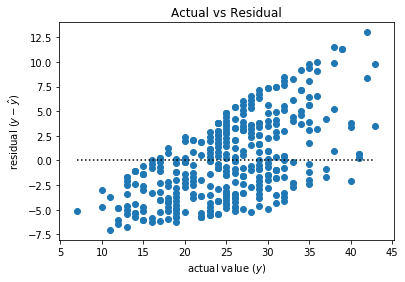

In [14]:
plot_residuals(evaluate.y, evaluate.yhat)

## Exercises

Create a new notebook or Python script named `evaluate`.

### Evaluating simple linear regressions on lemonade data with other features:
1. Create a dataframe from the csv at 
`https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv`
2. Make a baseline for predicting `sales`. (The mean is a good baseline)
3. Create a new dataframe to hold residuals. 
4. Calculate the baseline residuals. 
5. Use `ols` from `statsmodels` to create a simple linear regression (1 independent variable, 1 dependent variable) to predict `sales` using `flyers`.

```python
# the df variable is lemonade data

model = ols('sales ~ flyers', data=df).fit()
predictions = model.predict(df.x)
```

6. Use the `.predict` method from `ols` to produce all of our predictions. Add these predictions to the data

7. Calculate that model's residuals. 
8. Evaluate that model's performance and answer if the model is significant.
9. Evaluate that model's performance and answer if the feature is significant. 

### Repetition Improves Performance!
- In the next section of your notebook, perform the steps above with the `rainfall` column as the model's feature. Does this model beat the baseline? Would you prefer the `rainfall` model over the `flyers` model?
- In the next section of your notebook, perform the steps above with the `log_rainfall` column as the model's feature. Does this model beat the baseline? Would you prefer the `log_rainfall` model over the `flyers` model? Would you prefer the model built with `log_rainfall` over the `rainfall` model from before?
- In the next section of your notebook, perform the steps above with the `temperature` column as the model's only feature. Does this model beat the baseline? Would you prefer the `rainfall`, `log_rainfall`, or the `flyers` model?
- Which of these 4 single regression models would you want to move forward with?

### Tips dataset
1. Load the `tips` dataset from `pydataset` or `seaborn`
2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.
3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
Here is some sample code to get you started:

```python
from statsmodels.formula.api import ols
from pydataset import data

df = data("tips")

model = ols('tip ~ total_bill', data=df).fit()
predictions = model.predict(df.x)
```
4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model significantly better than the baseline model?

9. Plot the residuals for the linear regression model that you made.